In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import string
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

In [2]:
df = pd.read_csv(r'C:\Users\DELL\Downloads\Sentiment-Analysis-for-Product-Review-using-Machine-Learning-and-Deep-Learning--main\Sentiment-Analysis-for-Product-Review-using-Machine-Learning-and-Deep-Learning--main\Amazon_Product_Clothing_Shoes_and_Jewelry.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55000 entries, 0 to 54999
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0.1         55000 non-null  int64  
 1   Unnamed: 0           55000 non-null  int64  
 2   Customer_reviewText  55000 non-null  object 
 3   Unnamed: 3           0 non-null      float64
 4   Unnamed: 4           2 non-null      object 
dtypes: float64(1), int64(2), object(2)
memory usage: 2.1+ MB


In [4]:
df.shape

(55000, 5)

In [5]:
df.head()


,Unnamed: 0.1,Unnamed: 0,Customer_reviewText,Unnamed: 3,Unnamed: 4
0,65000,65000,"""fits great but not too hot and bulky so it...",NaN,NaN
1,65001,65001,"""great lounge set! i now own both colors a...",NaN,NaN
2,65002,65002,"""i ordered both colors and i am in love wit...",NaN,NaN
3,65003,65003,"""i purchased these for myself and was so ha...",NaN,NaN
4,65004,65004,"""i bought this for my son-in-law. he put i...",NaN,NaN


In [6]:
#convert to string
df['Customer_reviewText'] = df['Customer_reviewText'].astype(str) 
df.dtypes

Unnamed: 0.1             int64
Unnamed: 0               int64
Customer_reviewText     object
Unnamed: 3             float64
Unnamed: 4              object
dtype: object

In [7]:
df.isnull().sum()

Unnamed: 0.1               0
Unnamed: 0                 0
Customer_reviewText        0
Unnamed: 3             55000
Unnamed: 4             54998
dtype: int64

In [8]:
df = df.drop_duplicates(subset=['Customer_reviewText'])
df

,Unnamed: 0.1,Unnamed: 0,Customer_reviewText,Unnamed: 3,Unnamed: 4
0,65000,65000,"""fits great but not too hot and bulky so it...",NaN,NaN
1,65001,65001,"""great lounge set! i now own both colors a...",NaN,NaN
2,65002,65002,"""i ordered both colors and i am in love wit...",NaN,NaN
3,65003,65003,"""i purchased these for myself and was so ha...",NaN,NaN
4,65004,65004,"""i bought this for my son-in-law. he put i...",NaN,NaN
...,...,...,...,...,...
54995,119995,119995,"""absolutely love this robe. looks like it s...",NaN,NaN
54996,119996,119996,"""this robe fits true to size",NaN,NaN
54997,119997,119997,"""this is a superior satin men's robe. grea...",NaN,NaN
54998,119998,119998,"""this is a great item. no lining",NaN,NaN


In [9]:
df = df.drop(columns = ['Unnamed: 0','Unnamed: 0.1','Unnamed: 3','Unnamed: 4'])
df

,Customer_reviewText
0,"""fits great but not too hot and bulky so it..."
1,"""great lounge set! i now own both colors a..."
2,"""i ordered both colors and i am in love wit..."
3,"""i purchased these for myself and was so ha..."
4,"""i bought this for my son-in-law. he put i..."
...,...
54995,"""absolutely love this robe. looks like it s..."
54996,"""this robe fits true to size"
54997,"""this is a superior satin men's robe. grea..."
54998,"""this is a great item. no lining"


In [10]:
from textblob import Word, TextBlob

In [11]:

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

df['polarity'] = df['Customer_reviewText'].apply(pol)
df['subjectivity'] = df['Customer_reviewText'].apply(sub)
df

,Customer_reviewText,polarity,subjectivity
0,"""fits great but not too hot and bulky so it...",0.683333,0.866667
1,"""great lounge set! i now own both colors a...",0.812500,0.937500
2,"""i ordered both colors and i am in love wit...",0.300000,0.475000
3,"""i purchased these for myself and was so ha...",0.187500,0.687500
4,"""i bought this for my son-in-law. he put i...",0.700000,0.800000
...,...,...,...
54995,"""absolutely love this robe. looks like it s...",0.182099,0.403086
54996,"""this robe fits true to size",0.350000,0.650000
54997,"""this is a superior satin men's robe. grea...",0.642222,0.785556
54998,"""this is a great item. no lining",0.800000,0.750000


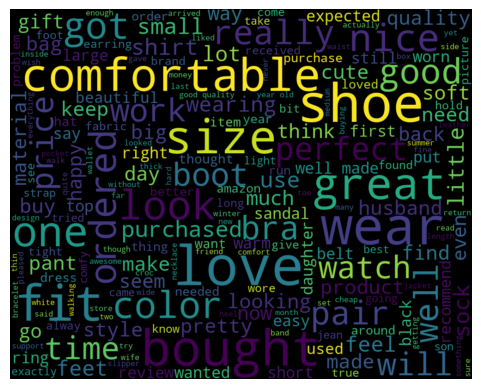

In [12]:
from wordcloud import WordCloud 
# Plot the Word Cloud
allWords = ' '.join([comnt for comnt in df['Customer_reviewText']])
wordCloud = WordCloud(width =1000, height =800, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis('off')
plt.show()

In [13]:
# Sentiment analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'
df['Class'] = df['polarity'].apply(getAnalysis)

df

,Customer_reviewText,polarity,subjectivity,Class
0,"""fits great but not too hot and bulky so it...",0.683333,0.866667,Positive
1,"""great lounge set! i now own both colors a...",0.812500,0.937500,Positive
2,"""i ordered both colors and i am in love wit...",0.300000,0.475000,Positive
3,"""i purchased these for myself and was so ha...",0.187500,0.687500,Positive
4,"""i bought this for my son-in-law. he put i...",0.700000,0.800000,Positive
...,...,...,...,...
54995,"""absolutely love this robe. looks like it s...",0.182099,0.403086,Positive
54996,"""this robe fits true to size",0.350000,0.650000,Positive
54997,"""this is a superior satin men's robe. grea...",0.642222,0.785556,Positive
54998,"""this is a great item. no lining",0.800000,0.750000,Positive


In [14]:
# Scatter-Plot the polarity and subjectivity in graph
# plt.figure(figsize=(8,6))
# for i in range(0, df.shape[0]):
# 	if df['Class'][i]=='Neutral':
#  		 plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Blue')
# 	elif df['Class'][i]=='Positive':
#  		 plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Green')
# 	else:
#  		 plt.scatter(df['polarity'][i], df['subjectivity'][i], color='Red')

# plt.title('Sentiment Analysis')
# plt.xlabel('Polarity')
# plt.ylabel('Subjectivity')
# plt.show()

In [15]:
# Get the percentage of positive comment
pcomment = df[df.Class == 'Positive']
pcomment = pcomment['Customer_reviewText']
round((pcomment.shape[0]/df.shape[0]*100), 1)

75.0

In [16]:
# Get the percentage of negative comment
ncomment = df[df.Class == 'Negative']
ncomment = ncomment['Customer_reviewText']
round((ncomment.shape[0]/df.shape[0]*100), 1)

11.4

In [17]:
# Get the percentage of neutral comment
nucomment = df[df.Class == 'Neutral']
nucomment = nucomment['Customer_reviewText']
round((nucomment.shape[0]/df.shape[0]*100), 1)

13.5

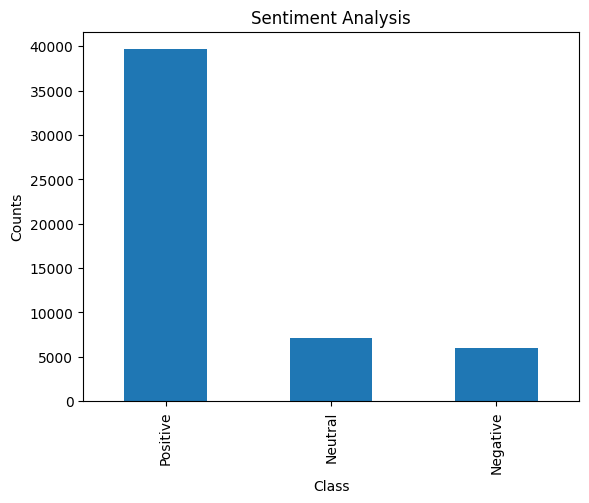

In [18]:
import matplotlib.pyplot as plt
import numpy as np
# Displaying the Sentiment Coutns
df['Class'].value_counts()
#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Class'].value_counts().plot(kind='bar')
plt.show()

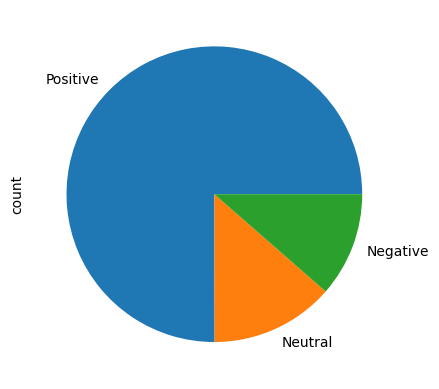

In [19]:
df['Class'].value_counts().plot(kind='pie')
plt.show()

In [20]:
def data_summary(df):
    
    """
    This function will print the summary of the reviews and words distribution in the dataset. 
    
    Args:
        dataset: list of cleaned sentences   
        
    Returns:
        Number of documnets per class: int 
        Number of words per class: int
        Number of unique words per class: int
    """
    documents = []
    words = []
    u_words = []
    total_u_words = [word.strip().lower() for t in list(df.Customer_reviewText) for word in t.strip().split()]
    class_label= [k for k,v in df.Class.value_counts().to_dict().items()]
  # find word list
    for label in class_label: 
        word_list = [word.strip().lower() for t in list(df[df.Class==label].Customer_reviewText) for word in t.strip().split()]
        counts = dict()
        for word in word_list:
                counts[word] = counts.get(word, 0)+1
        # sort the dictionary of word list  
        ordered = sorted(counts.items(), key= lambda item: item[1],reverse = True)
        # Documents per class
        documents.append(len(list(df[df.Class==label].Customer_reviewText)))
        # Total Word per class
        words.append(len(word_list))
        # Unique words per class 
        u_words.append(len(np.unique(word_list)))
       
        print("\nClass Name : ",label)
        print("Number of Documents:{}".format(len(list(df[df.Class==label].Customer_reviewText))))  
        print("Number of Words:{}".format(len(word_list))) 
        print("Number of Unique Words:{}".format(len(np.unique(word_list)))) 
        print("Most Frequent Words:\n")
        for k,v in ordered[:10]:
              print("{}\t{}".format(k,v))
    print("Total Number of Unique Words:{}".format(len(np.unique(total_u_words))))           
   
    return documents,words,u_words,class_label

#call the fucntion
documents,words,u_words,class_names = data_summary(df)


Class Name :  Positive
Number of Documents:39664
Number of Words:1149214
Number of Unique Words:46153
Most Frequent Words:

the	44521
and	39272
i	35977
a	32126
to	22523
is	20148
for	18924
it	18913
my	14803
are	14359

Class Name :  Neutral
Number of Documents:7161
Number of Words:74729
Number of Unique Words:9129
Most Frequent Words:

"i	2774
a	2445
the	2318
for	1870
i	1671
to	1482
this	1480
my	1420
and	1245
of	1216

Class Name :  Negative
Number of Documents:6044
Number of Words:149128
Number of Unique Words:13471
Most Frequent Words:

the	6022
i	4663
a	4553
and	3848
to	3210
it	2336
is	2267
"i	2188
for	2170
in	1899
Total Number of Unique Words:52945


                          **Preprocessing**

Lower casing

In [21]:
df['Customer_reviewText']=df['Customer_reviewText'].apply(lambda x: x.lower())

Punctuation Remove

In [22]:
#library that contains punctuation
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [23]:
#defining the function to remove punctuation
def remove_punctuation(text):
    punctuationfree="".join([i for i in text if i not in string.punctuation])
    return punctuationfree
#storing the puntuation free text
df['Customer_reviewText']= df['Customer_reviewText'].apply(lambda x:remove_punctuation(x))
df.head()

,Customer_reviewText,polarity,subjectivity,Class
0,fits great but not too hot and bulky so it ...,0.683333,0.866667,Positive
1,great lounge set i now own both colors and...,0.812500,0.937500,Positive
2,i ordered both colors and i am in love with...,0.300000,0.475000,Positive
3,i purchased these for myself and was so hap...,0.187500,0.687500,Positive
4,i bought this for my soninlaw he put it on...,0.700000,0.800000,Positive


Removing URLs

In [24]:
df['Customer_reviewText'] = df['Customer_reviewText'].str.replace('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', ' ')
df

,Customer_reviewText,polarity,subjectivity,Class
0,fits great but not too hot and bulky so it ...,0.683333,0.866667,Positive
1,great lounge set i now own both colors and...,0.812500,0.937500,Positive
2,i ordered both colors and i am in love with...,0.300000,0.475000,Positive
3,i purchased these for myself and was so hap...,0.187500,0.687500,Positive
4,i bought this for my soninlaw he put it on...,0.700000,0.800000,Positive
...,...,...,...,...
54995,absolutely love this robe looks like it sho...,0.182099,0.403086,Positive
54996,this robe fits true to size,0.350000,0.650000,Positive
54997,this is a superior satin mens robe great s...,0.642222,0.785556,Positive
54998,this is a great item no lining,0.800000,0.750000,Positive


Stopwords

It allows us to get rid of commonly used words.

In [25]:
def remove_stop(x):
  return ",".join([word for word in str(x).split() if word not in stop_words]) #stopwords removal)
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: remove_stop(x))
df

,Customer_reviewText,polarity,subjectivity,Class
0,"fits,great,hot,bulky,perfect,lounger,beach,wat...",0.683333,0.866667,Positive
1,"great,lounge,set,colors,pleased,excellent,qual...",0.812500,0.937500,Positive
2,"ordered,colors,love,lounge,setsthey,soft",0.300000,0.475000,Positive
3,"purchased,happy,soft,found,2,holes,inside,leg,...",0.187500,0.687500,Positive
4,"bought,soninlaw,put,soon,got,package,loved",0.700000,0.800000,Positive
...,...,...,...,...
54995,"absolutely,love,robe,looks,like,cost,200,im,51...",0.182099,0.403086,Positive
54996,"robe,fits,true,size",0.350000,0.650000,Positive
54997,"superior,satin,mens,robe,great,sizing,good,len...",0.642222,0.785556,Positive
54998,"great,item,lining",0.800000,0.750000,Positive


Remove emoji’s

In [26]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags 
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: remove_emoji(x))
df

,Customer_reviewText,polarity,subjectivity,Class
0,"fits,great,hot,bulky,perfect,lounger,beach,wat...",0.683333,0.866667,Positive
1,"great,lounge,set,colors,pleased,excellent,qual...",0.812500,0.937500,Positive
2,"ordered,colors,love,lounge,setsthey,soft",0.300000,0.475000,Positive
3,"purchased,happy,soft,found,2,holes,inside,leg,...",0.187500,0.687500,Positive
4,"bought,soninlaw,put,soon,got,package,loved",0.700000,0.800000,Positive
...,...,...,...,...
54995,"absolutely,love,robe,looks,like,cost,200,im,51...",0.182099,0.403086,Positive
54996,"robe,fits,true,size",0.350000,0.650000,Positive
54997,"superior,satin,mens,robe,great,sizing,good,len...",0.642222,0.785556,Positive
54998,"great,item,lining",0.800000,0.750000,Positive


Tokenization

break sentences into parts

In [27]:
# df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)

In [28]:
df["Customer_reviewText"]=df["Customer_reviewText"].apply(lambda x: TextBlob(x).words)
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fits, great, hot, bulky, perfect, lounger, be...",0.683333,0.866667,Positive
1,"[great, lounge, set, colors, pleased, excellen...",0.812500,0.937500,Positive
2,"[ordered, colors, love, lounge, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchased, happy, soft, found,2, holes, insid...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, package, lo...",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolutely, love, robe, looks, like, cost,200...",0.182099,0.403086,Positive
54996,"[robe, fits, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, mens, robe, great, sizing, g...",0.642222,0.785556,Positive
54998,"[great, item, lining]",0.800000,0.750000,Positive


Stemming

In [29]:
from nltk.stem import PorterStemmer
porter = PorterStemmer()

In [30]:
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: [porter.stem(y) for y in x])
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, pleas, excel, quali...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolut, love, robe, look, like, cost,200, im...",0.182099,0.403086,Positive
54996,"[robe, fit, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, men, robe, great, size, good...",0.642222,0.785556,Positive
54998,"[great, item, line]",0.800000,0.750000,Positive


Lemmatization 

is the process of separating words by root

In [31]:
from nltk.stem import WordNetLemmatizer
#defining the object for Lemmatization
wordnet_lemmatizer = WordNetLemmatizer()

In [32]:
df['Customer_reviewText'] = df['Customer_reviewText'].apply(lambda x: [wordnet_lemmatizer.lemmatize(y) for y in x])
df

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, plea, excel, qualit...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
54995,"[absolut, love, robe, look, like, cost,200, im...",0.182099,0.403086,Positive
54996,"[robe, fit, true, size]",0.350000,0.650000,Positive
54997,"[superior, satin, men, robe, great, size, good...",0.642222,0.785556,Positive
54998,"[great, item, line]",0.800000,0.750000,Positive


In [33]:
# distribution of the three classes
df['Class'].value_counts()

Class
Positive    39664
Neutral      7161
Negative     6044
Name: count, dtype: int64

In [34]:
pcomment = df[df.Class == 'Positive'][:18400]
pcomment

,Customer_reviewText,polarity,subjectivity,Class
0,"[fit, great, hot, bulki, perfect, lounger, bea...",0.683333,0.866667,Positive
1,"[great, loung, set, color, plea, excel, qualit...",0.812500,0.937500,Positive
2,"[order, color, love, loung, setsthey, soft]",0.300000,0.475000,Positive
3,"[purchas, happi, soft, found,2, hole, insid, l...",0.187500,0.687500,Positive
4,"[bought, soninlaw, put, soon, got, packag, love]",0.700000,0.800000,Positive
...,...,...,...,...
25174,"[kind, hokey, tri, felt, bulki, though, realli...",0.400000,0.550000,Positive
25175,"[idea, behind, product, great]",0.200000,0.725000,Positive
25177,"[realli, small, good, im, sure, could, fit, go...",0.250000,0.511111,Positive
25178,"[got, beig, trip, nyci, guess, didnt, think, p...",0.348148,0.462963,Positive


In [35]:
ncomment = df[df.Class == 'Negative']
ncomment

,Customer_reviewText,polarity,subjectivity,Class
15,"[unlik, review]",-0.125000,0.375000,Negative
22,"[nice, hat, fit, size, place, put, rank, insig...",-0.010000,0.950000,Negative
24,"[realli, like, size, bag, usual, casual, mode,...",-0.065000,0.661667,Negative
25,"[use, le, sportsac, bag, swim, gear, love, sta...",-0.158333,0.858333,Negative
26,"[bought, handbag, last, spring, wore, summer, ...",-0.116667,0.616667,Negative
...,...,...,...,...
54942,"[ring, brighter, pictur, unlik, review]",-0.125000,0.375000,Negative
54947,"[small, size, order, tri, wear, one, pair, tor...",-0.020833,0.369444,Negative
54958,"[look, silk, boxer, store, day, difficult, fou...",-0.107143,0.767857,Negative
54966,"[order, think, silk, stupid, realli, disappoin...",-0.343333,0.886667,Negative


In [36]:
Neucomment = df[df.Class == 'Neutral']
Neucomment

,Customer_reviewText,polarity,subjectivity,Class
8,"[like, wear]",0.0,0.000000,Neutral
31,"[like, bag, dont, chintz]",0.0,0.000000,Neutral
32,"[bought, bag, differ, design, fabric, australia]",0.0,0.362500,Neutral
58,"[espectacular, sunglass]",0.0,0.000000,Neutral
59,"[feel, solid]",0.0,0.100000,Neutral
...,...,...,...,...
54945,"[ring, oval]",0.0,0.000000,Neutral
54955,"[bought, boxer, short, dad, hospit, heart, con...",0.0,0.000000,Neutral
54959,"[like, product, receiv]",0.0,0.000000,Neutral
54963,"[got, one, set, father, last, year, sleep, tsh...",0.0,0.066667,Neutral


In [37]:
df = pd.concat([pcomment,ncomment,Neucomment], axis = 0)

In [38]:
df.Class.value_counts()

Class
Positive    18400
Neutral      7161
Negative     6044
Name: count, dtype: int64

In [39]:
import seaborn as sns

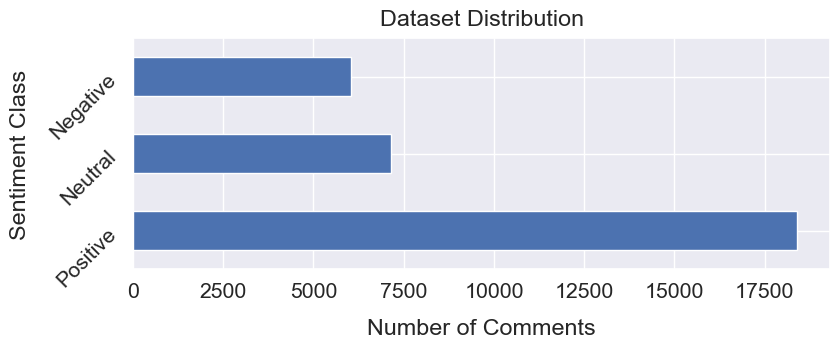

In [40]:
sns.set(font_scale=1.4)
df['Class'].value_counts().plot(kind='barh', figsize=(9, 3))
plt.xlabel("Number of Comments", labelpad=12)
plt.ylabel("Sentiment Class", labelpad=12)
plt.yticks(rotation = 45)
plt.title("Dataset Distribution", y=1.02);

LabelEncoder

In [41]:
from sklearn.preprocessing import LabelEncoder
df['Class'] = LabelEncoder().fit_transform(df['Class'])
df['Class']

0        2
1        2
2        2
3        2
4        2
        ..
54945    1
54955    1
54959    1
54963    1
54981    1
Name: Class, Length: 31605, dtype: int64

In [42]:
df['Customer_reviewText'] = df['Customer_reviewText'].astype(str)
df['Customer_reviewText']

0        ['fit', 'great', 'hot', 'bulki', 'perfect', 'l...
1        ['great', 'loung', 'set', 'color', 'plea', 'ex...
2        ['order', 'color', 'love', 'loung', 'setsthey'...
3        ['purchas', 'happi', 'soft', 'found,2', 'hole'...
4        ['bought', 'soninlaw', 'put', 'soon', 'got', '...
                               ...                        
54945                                     ['ring', 'oval']
54955    ['bought', 'boxer', 'short', 'dad', 'hospit', ...
54959                        ['like', 'product', 'receiv']
54963    ['got', 'one', 'set', 'father', 'last', 'year'...
54981                          ['husband', 'love', 'item']
Name: Customer_reviewText, Length: 31605, dtype: object

In [43]:
x = df.Customer_reviewText.values
y= df.Class.values


In [44]:
x.shape,y.shape

((31605,), (31605,))

Tokenizer

In [45]:
MAX_NB_WORDS = 31605

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences  # or use tensorflow.keras.preprocessing.sequence if applicable

#from keras.preprocessing.text import Tokenizer
#from tensorflow.keras.preprocessing.sequence import pad_sequences

In [47]:
tokenizer = Tokenizer(num_words=MAX_NB_WORDS, char_level=False)
tokenizer.fit_on_texts(df.Customer_reviewText)
sequences = tokenizer.texts_to_sequences(df.Customer_reviewText)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

Found 19362 unique tokens.


In [48]:
sequences[0]

[3, 7, 414, 615, 40, 7939, 551, 33, 1771, 1576, 15, 102, 1333]

In [49]:
type(tokenizer.word_index), len(tokenizer.word_index)

(dict, 19362)

In [50]:
index_to_word = dict((i, w) for w, i in tokenizer.word_index.items())

In [51]:
" ".join([index_to_word[i] for i in sequences[0]])

"'fit' 'great' 'hot' 'bulki' 'perfect' 'lounger' 'beach' 'watch' 'tv' 'indoor' 'would' 'wash' 'alon'"

In [52]:
seq_lens = [len(s) for s in sequences]
print("average length: %0.1f" % np.mean(seq_lens))
print("max length: %d" % max(seq_lens))

average length: 11.8
max length: 215


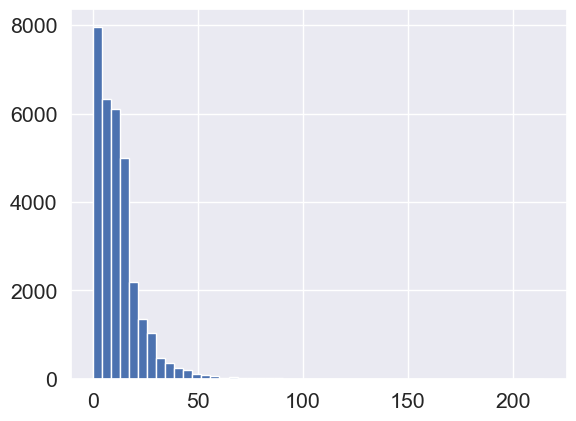

In [53]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.hist(seq_lens, bins=50);

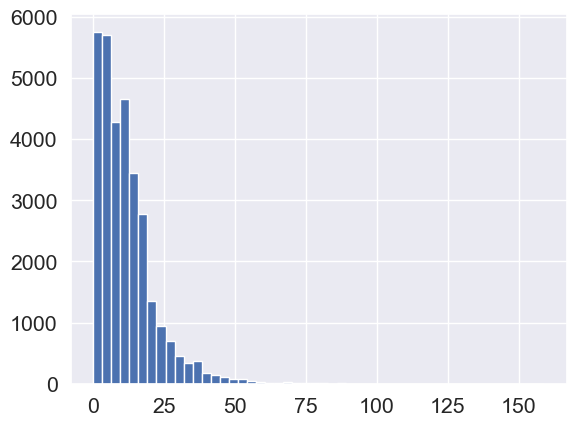

In [54]:
plt.hist([l for l in seq_lens if l < 200], bins=50);

Stemming

In [55]:
MAX_SEQUENCE_LENGTH = 215
# pad sequences with 0s
x = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
print('Shape of data tensor:', x.shape)


Shape of data tensor: (31605, 215)


over_sampling

In [56]:
from imblearn.over_sampling import SMOTE, ADASYN
import collections
x_resampled, y_resampled = SMOTE().fit_resample(x,y)
print(sorted(collections.Counter(y_resampled).items()))

[(np.int64(0), 18400), (np.int64(1), 18400), (np.int64(2), 18400)]


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
#Miscellanous libraries
from collections import Counter

Class=2, n=18400 (58.219%)
Class=0, n=18400 (58.219%)
Class=1, n=18400 (58.219%)


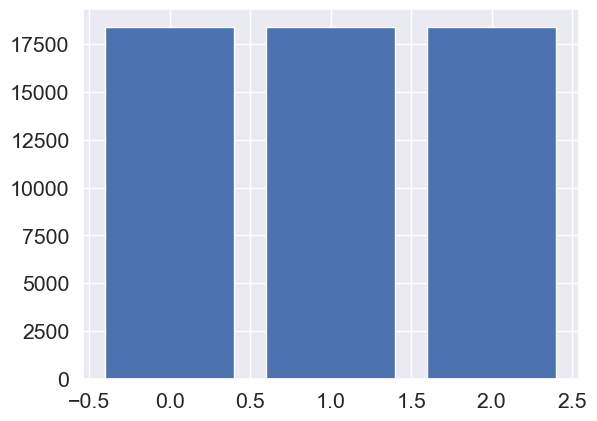

In [58]:
counter = Counter(y_resampled)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

In [59]:
x_resampled.shape,y_resampled.shape

((55200, 215), (55200,))

In [60]:
len(y_resampled)

55200

In [61]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_resampled,y_resampled,train_size=0.80, shuffle=True, random_state=45)

In [62]:
X_train.shape, X_test.shape

((44160, 215), (11040, 215))

In [63]:
y_test.shape

(11040,)

In [64]:
from keras.utils import to_categorical

In [65]:
y_train = to_categorical(np.asarray(y_train))
y_test= to_categorical(np.asarray(y_test))
print('Shape of label tensor Y_test:', y_test.shape)
print('Shape of label tensor Y_train:', y_train.shape)

Shape of label tensor Y_test: (11040, 3)
Shape of label tensor Y_train: (44160, 3)


Long Short-Term Memory(LSTM)

In [66]:
EMBEDDING_DIM = 450
N_CLASSES = 3

In [67]:
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D 
from keras.models import Sequential

In [68]:
## Creating model
'''model_lstm=Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, MAX_SEQUENCE_LENGTH,))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(3, activation='softmax'))



# Define the LSTM model
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=MAX_SEQUENCE_LENGTH))
model_lstm.add(SpatialDropout1D(0.2))
model_lstm.add(LSTM(units=100, dropout=0.2, recurrent_dropout=0.2))
model_lstm.add(Dense(1, activation='sigmoid'))

# Build the model with the input shape
#model_lstm.build(input_shape=(None, MAX_SEQUENCE_LENGTH))

# Plot the model
#keras.utils.plot_model(model_lstm, to_file='lstm.png', show_shapes=True)'''


model_lstm=Sequential()
model_lstm.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))
model_lstm.add(SpatialDropout1D(0.5))
model_lstm.add(LSTM(128))
model_lstm.add(Dense(64, activation='relu'))
model_lstm.add(Dense(3, activation='softmax'))
model_lstm.add(Dense(1, activation='sigmoid'))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [69]:
model_lstm.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model_lstm.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ spatial_dropout1d               │ ?                      │             0 │
│ (SpatialDropout1D)              │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [70]:
from tensorflow import keras

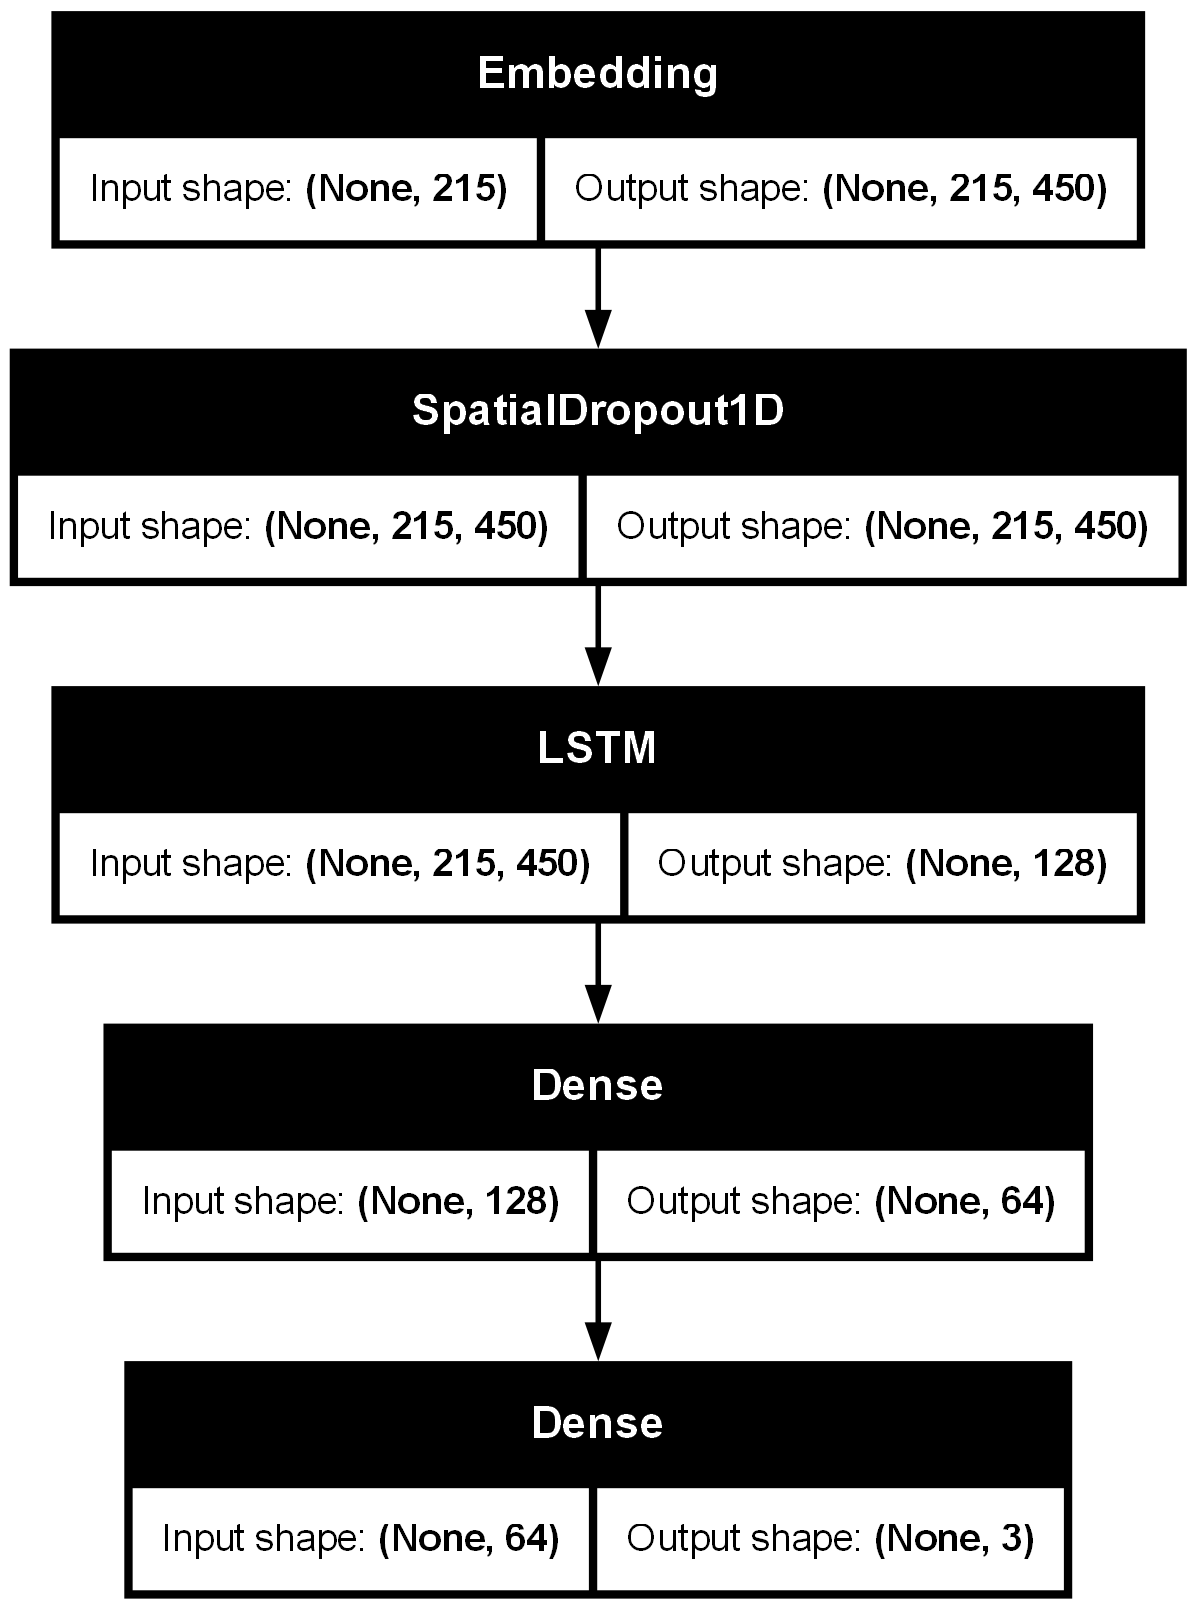

In [71]:

model_lstm.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
keras.utils.plot_model(model_lstm,to_file='lstm.png',show_shapes=True)

In [72]:
from keras.callbacks import EarlyStopping
earlyStop=EarlyStopping(monitor="val_loss",verbose=2,mode='min',patience=3)

In [73]:
lstm_model_fit = model_lstm.fit(X_train , y_train , validation_data= (X_test , y_test),batch_size = 32, 
          epochs = 40,verbose =2,callbacks=[earlyStop])

Epoch 1/40
1380/1380 - 505s - 366ms/step - accuracy: 0.6496 - loss: 0.7798 - val_accuracy: 0.6988 - val_loss: 0.6856
Epoch 2/40
1380/1380 - 513s - 372ms/step - accuracy: 0.7521 - loss: 0.5946 - val_accuracy: 0.7191 - val_loss: 0.6554
Epoch 3/40
1380/1380 - 535s - 388ms/step - accuracy: 0.8088 - loss: 0.4669 - val_accuracy: 0.7258 - val_loss: 0.6704
Epoch 4/40
1380/1380 - 564s - 409ms/step - accuracy: 0.8525 - loss: 0.3677 - val_accuracy: 0.7322 - val_loss: 0.7085
Epoch 5/40
1380/1380 - 586s - 425ms/step - accuracy: 0.8819 - loss: 0.2938 - val_accuracy: 0.7239 - val_loss: 0.7847
Epoch 5: early stopping


In [83]:
accuracy = model_lstm.evaluate(X_test, y_test)
print(accuracy)

345/345 ━━━━━━━━━━━━━━━━━━━━ 20s 59ms/step - accuracy: 0.7241 - loss: 0.7702
[0.7846572399139404, 0.7239130139350891]


In [84]:
print("Accuracy: %.2f%%" % (accuracy[1]*100))

Accuracy: 72.39%


In [85]:
preds = np.round(model_lstm.predict((X_test)),0)
print("rounded test_labels",preds)

345/345 ━━━━━━━━━━━━━━━━━━━━ 17s 49ms/step
rounded test_labels [[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 1. 0.]]


In [86]:
test_labels = np.array((y_test))

In [87]:
from sklearn import metrics

In [88]:
experiment_labels = ["0","1","2" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.68      0.63      0.66      3616
           1       0.74      0.69      0.72      3625
           2       0.78      0.79      0.79      3799

   micro avg       0.74      0.71      0.72     11040
   macro avg       0.74      0.71      0.72     11040
weighted avg       0.74      0.71      0.72     11040
 samples avg       0.71      0.71      0.71     11040



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


345/345 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step


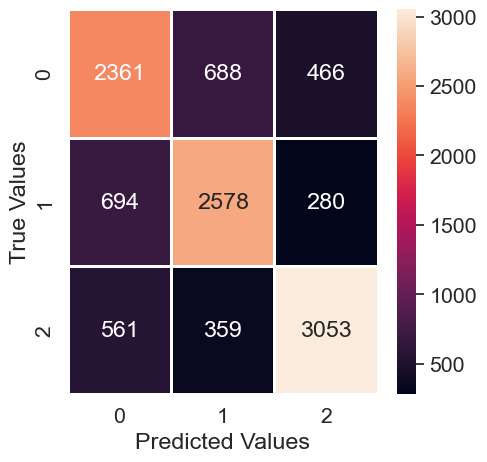

In [89]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(5, 5))

pred = model_lstm.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')

plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [90]:
comment=['Product is very good, fit is good']
sequence = tokenizer.texts_to_sequences(comment)
test = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
pred = model_lstm.predict(test)
labels = ['0','1','2']
print(labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 136ms/step
1


In [96]:
hist = pd.DataFrame(lstm_model_fit.history)

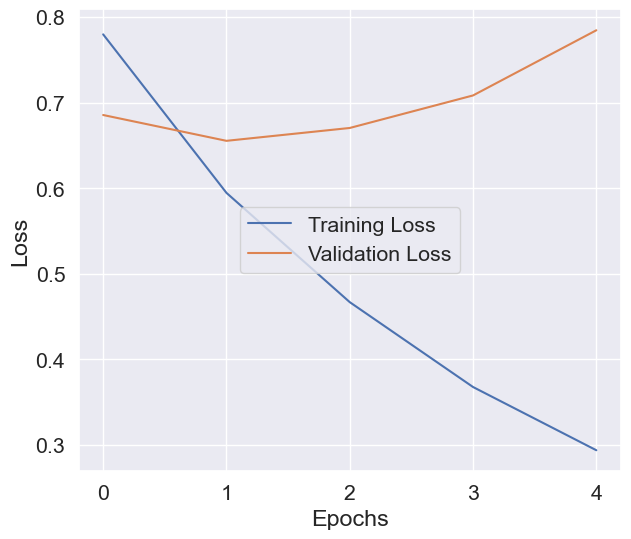

In [97]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
hist['loss'].plot(label='Training Loss')
hist['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

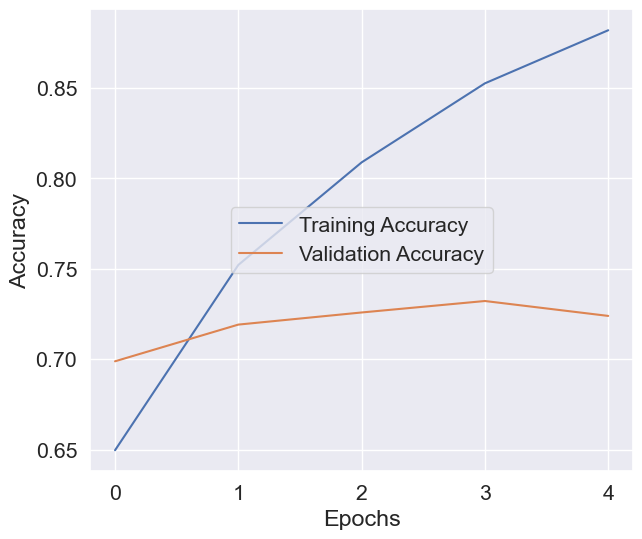

In [98]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
hist['accuracy'].plot(label='Training Accuracy')
hist['val_accuracy'].plot(label='Validation Accuracy')
plt.legend(loc='center')

 Convolutional Neural Network (CNN)

In [99]:
from keras.layers import Dense , Dropout , Activation
from keras.layers import MaxPooling1D , GlobalMaxPooling1D,Conv1D , Flatten

In [100]:
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length = MAX_SEQUENCE_LENGTH))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Conv1D(64 , 5 , padding = 'same',activation = 'relu'))
model.add(MaxPooling1D(5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(3, activation='softmax'))

C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [102]:
model.compile(loss = 'categorical_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_2 (MaxPooling1D)  │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

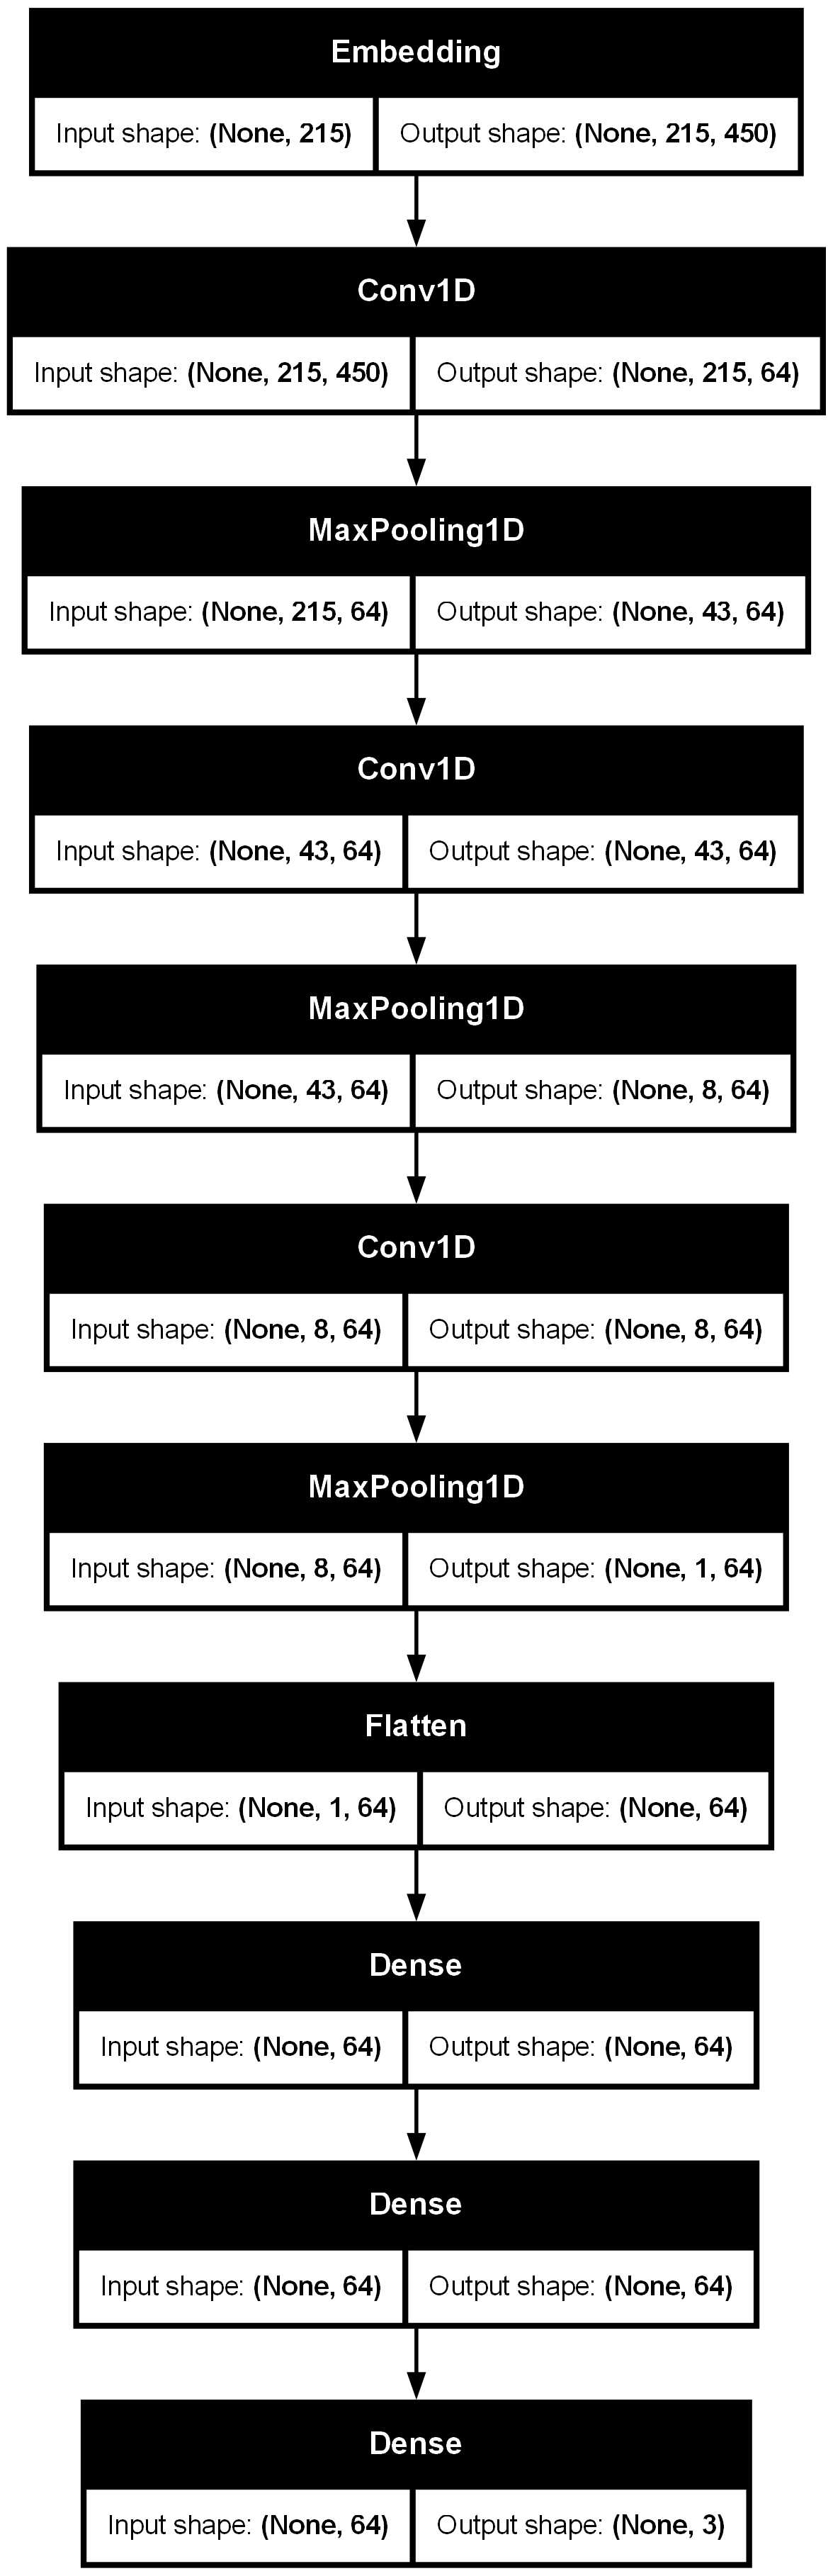

In [104]:
model.build(input_shape=(None, MAX_SEQUENCE_LENGTH))
keras.utils.plot_model(model,to_file='cnn.png',show_shapes=True)

In [105]:
cnn_model=model.fit(X_train , y_train , validation_data= (X_test , y_test) ,batch_size = 32, 
          epochs = 40, verbose = 2,callbacks=[earlyStop])

Epoch 1/40
32/32 - 19s - 585ms/step - accuracy: 0.3170 - loss: 1.1011 - val_accuracy: 0.3441 - val_loss: 1.0984
Epoch 2/40
32/32 - 15s - 481ms/step - accuracy: 0.4910 - loss: 1.0699 - val_accuracy: 0.3275 - val_loss: 1.1048
Epoch 3/40
32/32 - 13s - 419ms/step - accuracy: 0.7030 - loss: 0.7251 - val_accuracy: 0.3274 - val_loss: 1.2527
Epoch 4/40
32/32 - 14s - 425ms/step - accuracy: 0.8810 - loss: 0.3428 - val_accuracy: 0.3197 - val_loss: 1.1452
Epoch 4: early stopping


In [106]:
scores = model.evaluate(X_test, y_test, verbose=0)
scores

[1.1452414989471436, 0.31965580582618713]

In [107]:
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 31.97%


In [108]:
from sklearn import metrics

In [109]:
preds = np.round(model.predict((X_test)),0)
print("rounded test_labels",preds)

345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 20ms/step
rounded test_labels [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 ...
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


In [110]:
test_labels = np.array((y_test))

In [111]:
experiment_labels = ["0","1","2" ]
classification_metrics = metrics.classification_report(test_labels,preds,target_names=experiment_labels)
print(classification_metrics)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3616
           1       0.00      0.00      0.00      3625
           2       1.00      0.00      0.00      3799

   micro avg       0.60      0.00      0.00     11040
   macro avg       0.33      0.00      0.00     11040
weighted avg       0.34      0.00      0.00     11040
 samples avg       0.00      0.00      0.00     11040



C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\DELL\AppData\Roaming\Python\Python311\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


345/345 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step


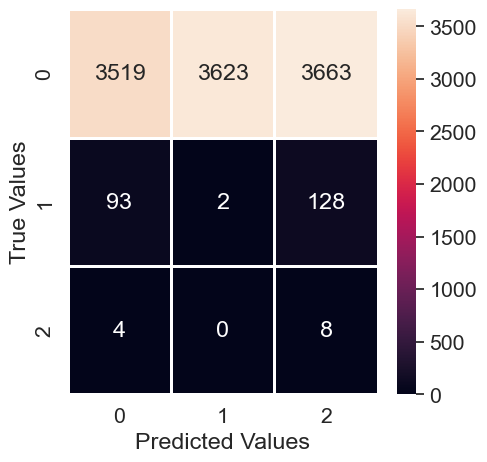

In [112]:
from sklearn.metrics import confusion_matrix

fig = plt.figure(figsize=(5, 5))

pred = model.predict(X_test)

pred = np.argmax(pred, 1)
test = np.argmax(y_test, 1)

mat = confusion_matrix(test,pred)
sns.heatmap(mat.T, linewidths=1, annot=True, fmt='g')
plt.xlabel('Predicted Values')
plt.ylabel('True Values');
plt.show();


In [113]:
comment=['this product is poor for me and I am not satisfied with this product',
         'Product is very good, fit is good','where the product is produced']
sequence = tokenizer.texts_to_sequences(comment)
test = pad_sequences(sequence, maxlen=MAX_SEQUENCE_LENGTH)
pred = model.predict(test)
labels = ['0','1','2']
print(pred,labels[np.argmax(pred)])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 248ms/step
[[0.40985715 0.37948203 0.21066079]
 [0.40985715 0.37948203 0.21066079]
 [0.40985715 0.37948203 0.21066079]] 0


In [114]:
hist = pd.DataFrame(cnn_model.history)

In [115]:
y_pred = model.predict(X_test)

345/345 ━━━━━━━━━━━━━━━━━━━━ 7s 19ms/step


In [116]:
ypred = [np.argmax(i) for i in y_pred]

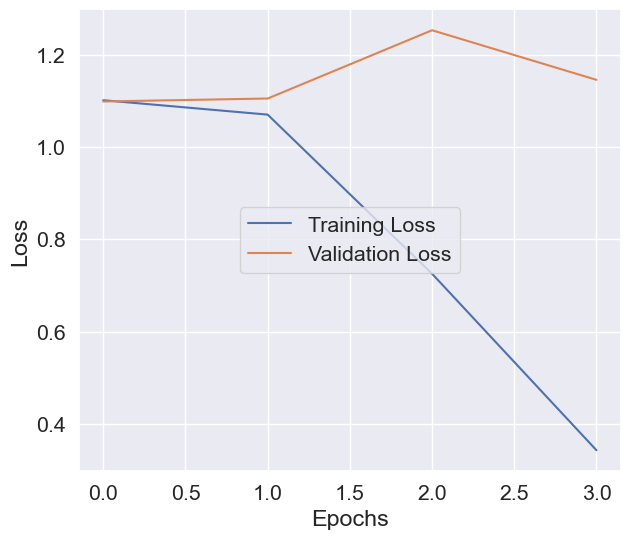

In [117]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Loss')
hist['loss'].plot(label='Training Loss')
hist['val_loss'].plot(label='Validation Loss')
plt.legend(loc='center')

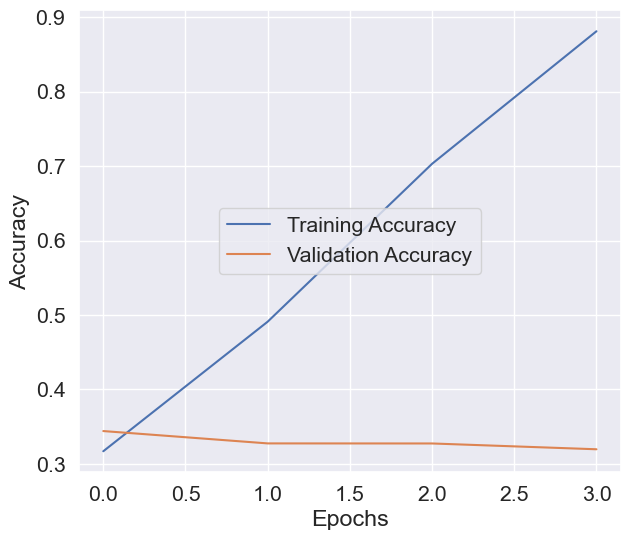

In [118]:
plt.figure(figsize=(7,6))
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
hist['accuracy'].plot(label='Training Accuracy')
hist['val_accuracy'].plot(label='Validation Accuracy')
plt.legend(loc='center')